<a href="https://colab.research.google.com/github/Karan-dev-cyber/MachineLearning/blob/master/WineClassifierMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
#
# load data
#
wine = load_wine()
data = pd.DataFrame(wine.data,columns = wine.feature_names)
data['target'] = wine.target

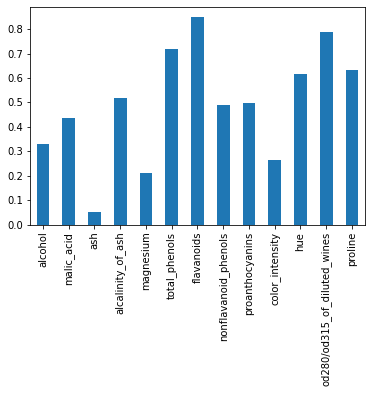

In [ ]:
#
# visualising the correlation and balance
#

data.corr()['target'].drop('target').map(lambda data:abs(data)).plot(kind = 'bar')
count = data['target'].value_counts()

In [ ]:
#
# Split the data
#
X = data.drop('target',axis = 1).values
Y = data['target'].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 1,test_size = 0.25)

In [ ]:
#
# Defining the class
#

class WineClassifier:

  def __init__(self,scaled,K):
    self.scaled = scaled
    self.K = K
    self.model = None
  
  def classifier(self,X_train,Y_train):
    self.model = KNeighborsClassifier(n_neighbors = self.K,
                                      metric = 'euclidean')
    self.model.fit(X_train,Y_train)
  
  def fit(self,train,test,metric = False):
    X_train,Y_train = train
    X_test,Y_test = test
    
    if self.scaled:
      self.scale = MinMaxScaler()
      X_train = self.scale.fit_transform(X_train)
      X_test = self.scale.transform(X_test)
    
    self.classifier(X_train,Y_train)

    if metric:
      self.evaluation(X_test,Y_test)
  def pred(self,data):

    if self.scaled:
      data = self.scale.transform(data)
    
    y_pred = self.model.predict(data)
    return y_pred
  
  def evaluation(self,X_test,Y_test):
    if self.scaled:
      X_test = self.scale.inverse_transform(X_test)
    y_pred = self.pred(X_test)
    
    print('Validation accuracy',accuracy_score(y_pred,Y_test))

In [ ]:
model = WineClassifier(scaled = True,K = 11)

In [ ]:
model.fit((X_train,Y_train),(X_test,Y_test))

Validation accuracy 0.9777777777777777
